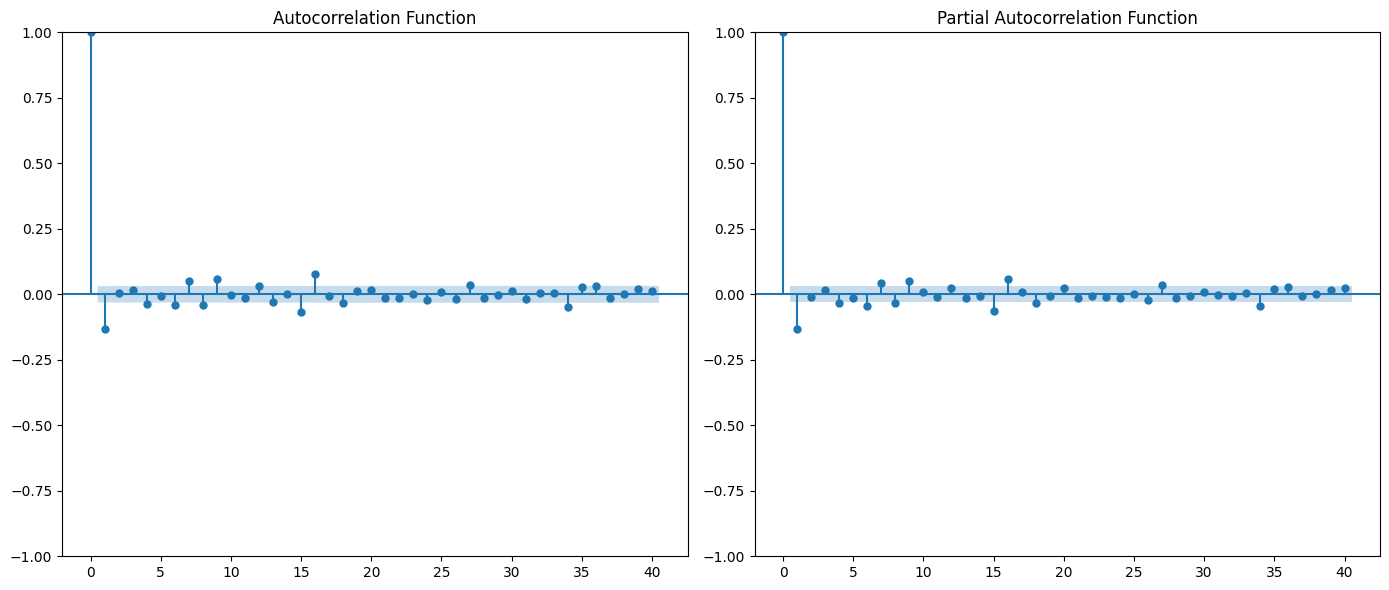

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb

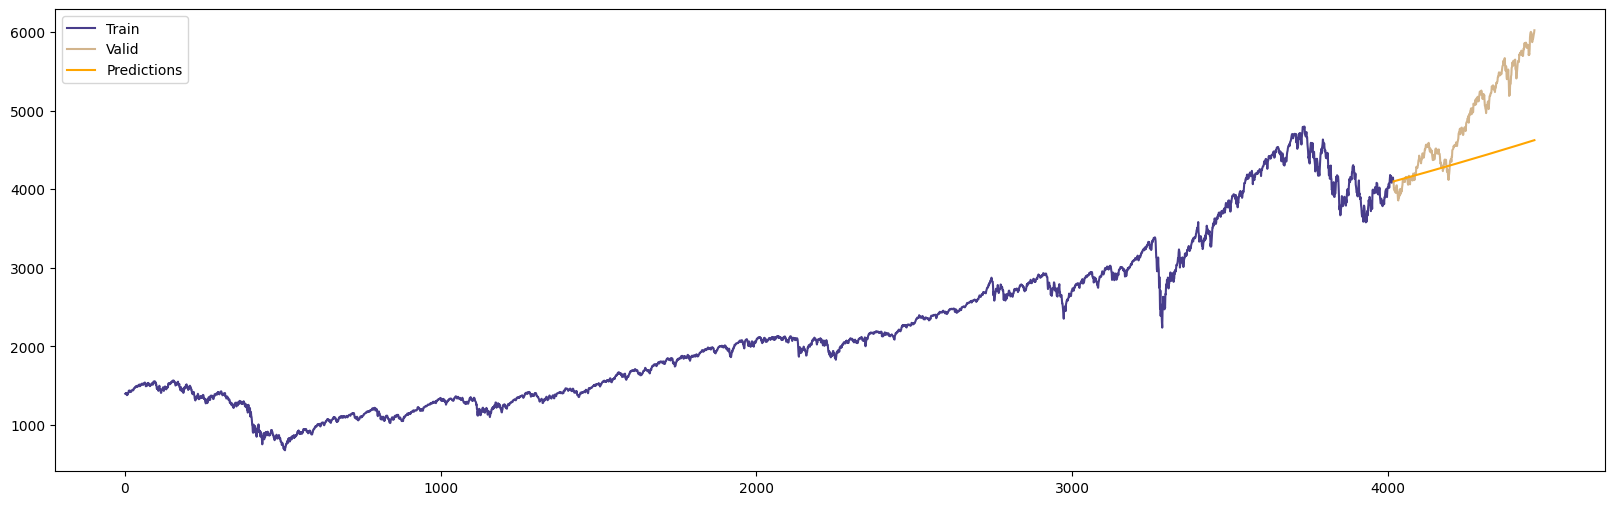

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
sp500_data = pd.read_csv('sp500.csv')

# Preprocess the data
sp500_data['Returns'] = np.diff(np.log(sp500_data['Close']), prepend=np.nan)
sp500_data = sp500_data.dropna(subset=['Returns'])

# Split the data into training and validation sets
train_data = sp500_data['Returns'][:int(0.9 * len(sp500_data))]
valid_data = sp500_data['Returns'][int(0.9 * len(sp500_data)):] 

# Plot ACF and PACF to determine ARIMA orders
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(train_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit an ARIMA model
p, d, q = 1, 0, 1  # Example values, adjust based on ACF/PACF plots
arima_model = sm.tsa.ARIMA(train_data, order=(p, d, q)).fit()

# Make predictions
start_idx = len(train_data)
end_idx = len(train_data) + len(valid_data) - 1
y_pred = arima_model.predict(start=start_idx, end=end_idx, typ='levels')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(sp500_data.index[:len(train_data)], sp500_data['Close'][:len(train_data)], color='darkslateblue', label='Train')
plt.plot(sp500_data.index[len(train_data):], sp500_data['Close'][len(train_data):], color='tan', label='Valid')
plt.plot(sp500_data.index[len(train_data):], np.exp(np.cumsum(y_pred)) * sp500_data['Close'].iloc[len(train_data) - 1], color='orange', label='Predictions')
plt.legend()
plt.show()


## GARCH

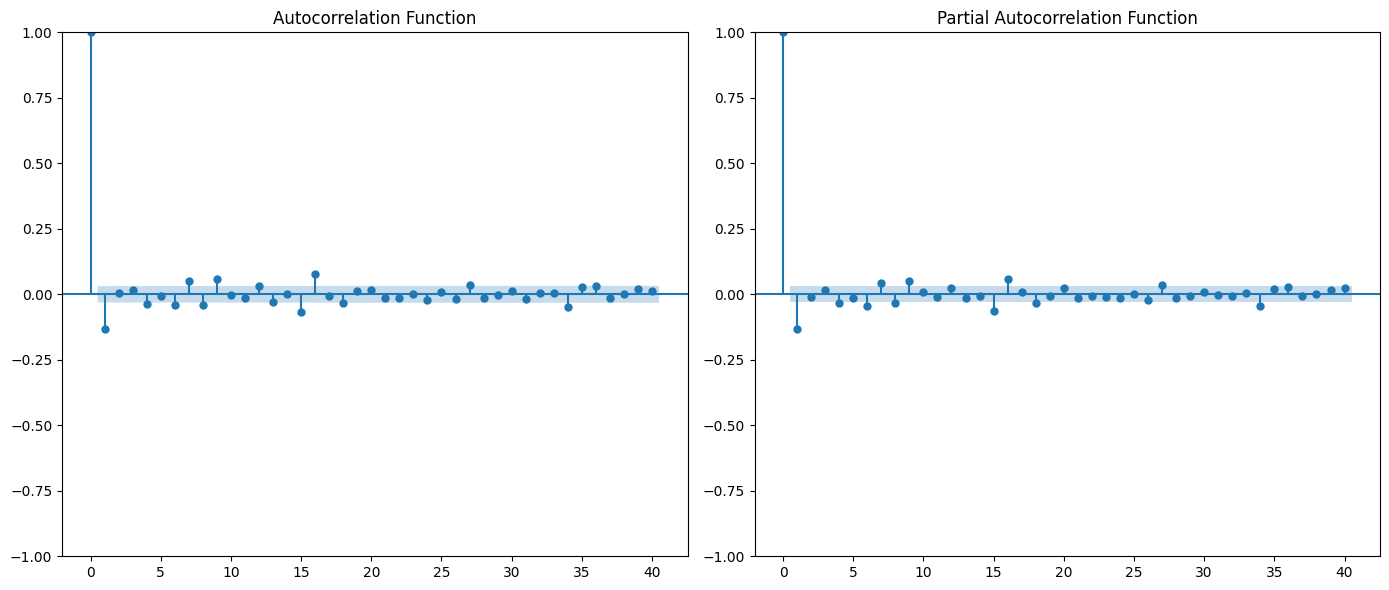

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001704. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                12896.3
Distribution:                  Normal   AIC:                          -25784.6
Method:            Maximum Likelihood   BIC:                          -25759.4
                                        No. Observations:                 4018
Date:                Thu, Nov 28 2024   Df Residuals:                     4017
Time:                        15:01:31   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1644e-04  9.705e-06     84.125      0.000 [7.

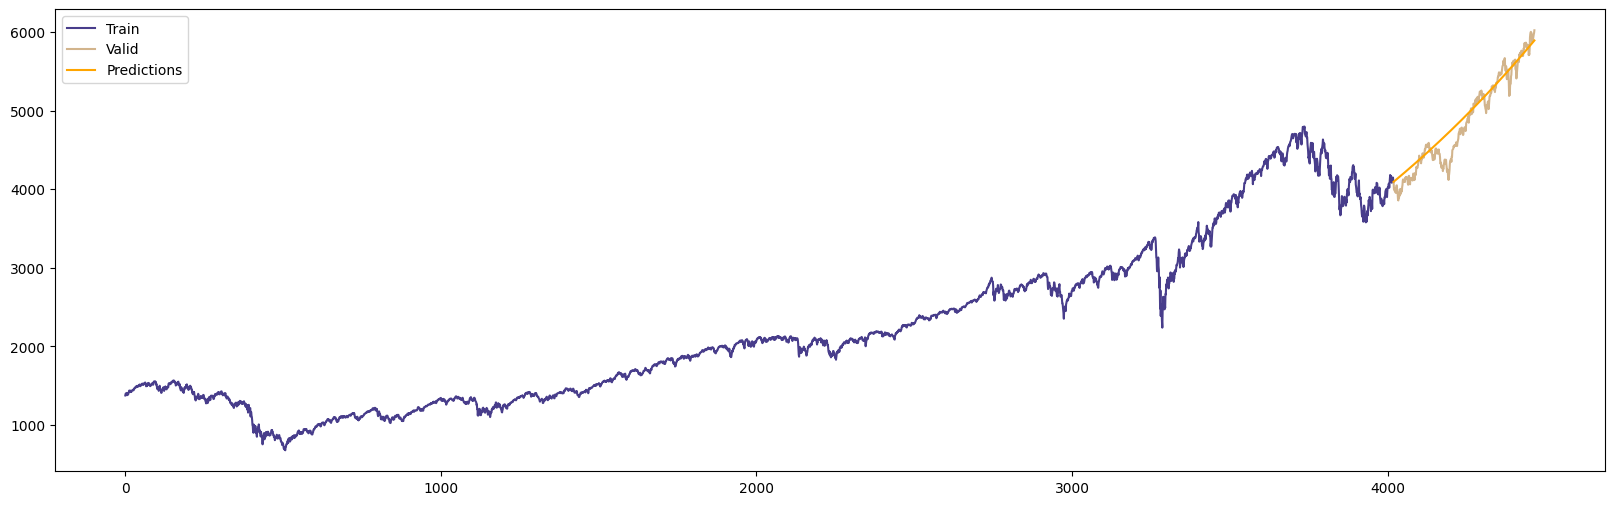

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
sp500_data = pd.read_csv('sp500.csv')

# Preprocess the data
sp500_data = sp500_data.dropna(subset=['Close'])

# Split the data into training and validation sets
train_data = sp500_data['Close'][:int(0.9 * len(sp500_data))]
valid_data = sp500_data['Close'][int(0.9 * len(sp500_data)):] 

# Plot ACF and PACF to understand the volatility clustering
train_returns = np.diff(np.log(train_data))
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train_returns, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(train_returns, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit a GARCH model
# GARCH(1, 1) model is commonly used for financial returns data
garch_model = arch_model(train_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Make predictions on the validation set
forecast = garch_fit.forecast(horizon=len(valid_data))
volatility_forecast = forecast.variance.values[-1, :]
y_pred_diff = forecast.mean.values[-1, :]

# Calculate predicted prices from returns and previous price
predicted_prices = [train_data.iloc[-1]]
for ret in y_pred_diff:
    predicted_prices.append(predicted_prices[-1] * np.exp(ret))

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(sp500_data.index[:len(train_data)], sp500_data['Close'][:len(train_data)], color='darkslateblue', label='Train')
plt.plot(sp500_data.index[len(train_data):], sp500_data['Close'][len(train_data):], color='tan', label='Valid')
plt.plot(sp500_data.index[len(train_data):], predicted_prices[1:], color='orange', label='Predictions')
plt.legend()
plt.show()


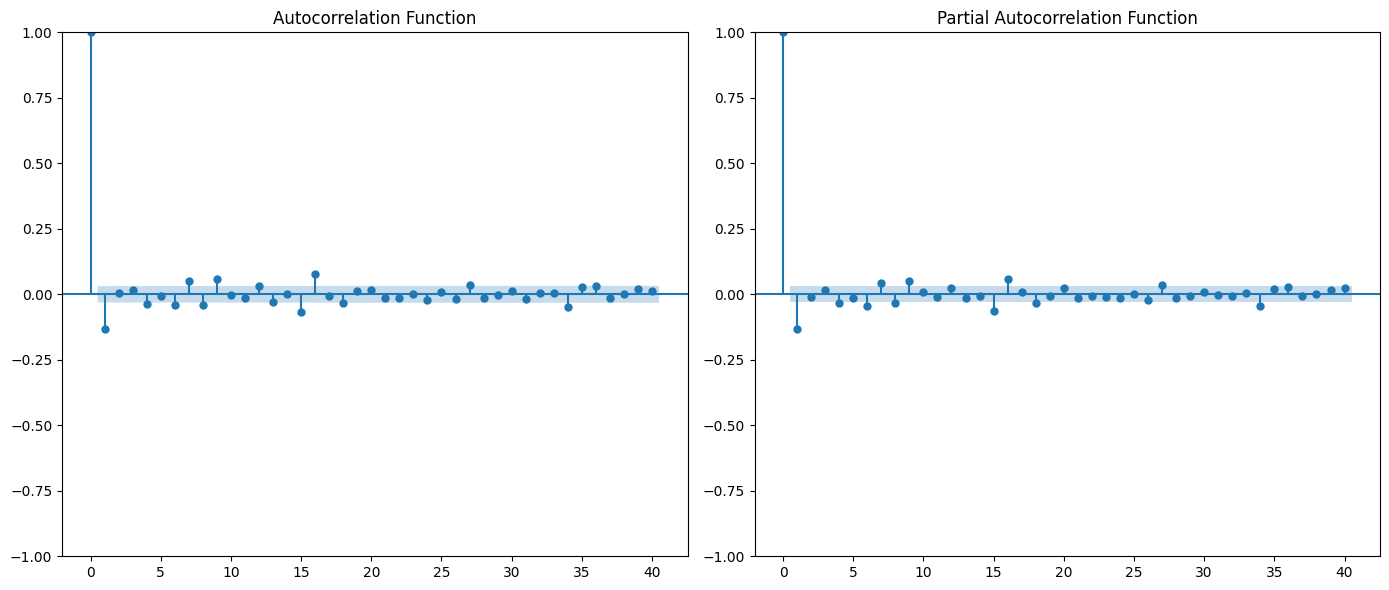

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5595.35
Distribution:                  Normal   AIC:                           11198.7
Method:            Maximum Likelihood   BIC:                           11223.9
                                        No. Observations:                 4018
Date:                Thu, Nov 28 2024   Df Residuals:                     4017
Time:                        15:04:16   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0716  1.270e-02      5.641  1.692e-08 [4.

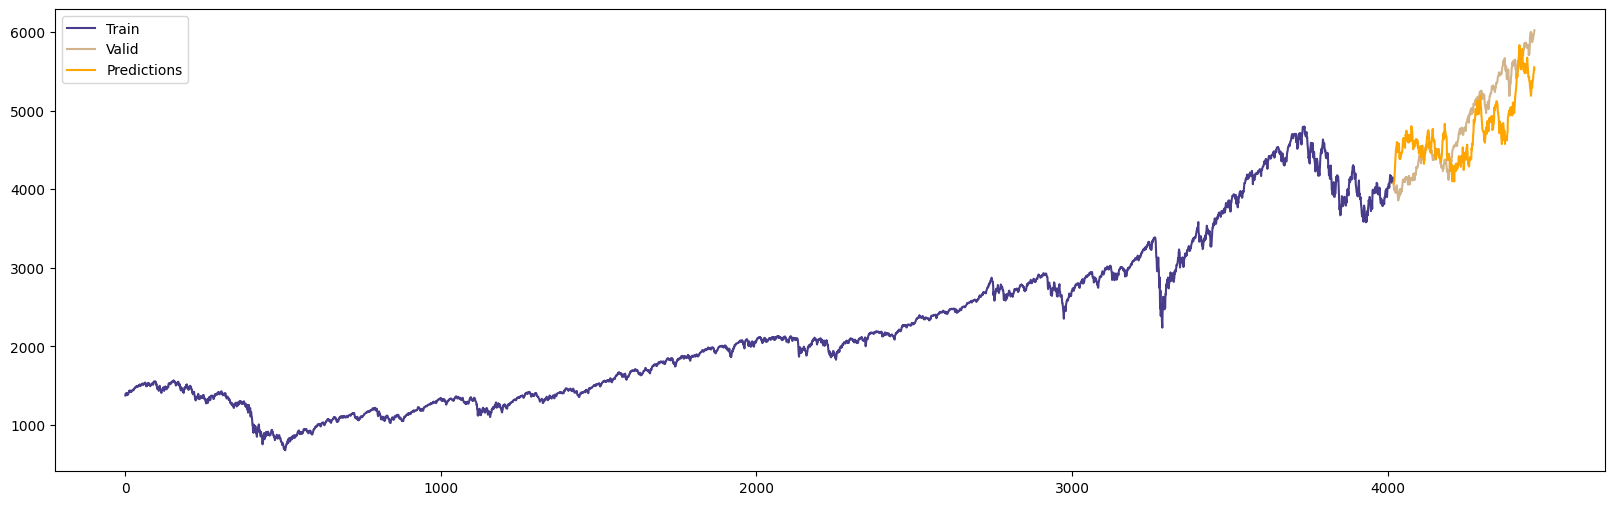

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
sp500_data = pd.read_csv('sp500.csv')

# Preprocess the data
sp500_data = sp500_data.dropna(subset=['Close'])

# Split the data into training and validation sets
train_data = sp500_data['Close'][:int(0.9 * len(sp500_data))]
valid_data = sp500_data['Close'][int(0.9 * len(sp500_data)):] 

# Plot ACF and PACF to understand the volatility clustering
train_returns = np.diff(np.log(train_data))
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train_returns, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(train_returns, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit a GARCH model
# GARCH(1, 1) model is commonly used for financial returns data
garch_model = arch_model(train_returns * 100, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Make predictions on the validation set
forecast = garch_fit.forecast(horizon=len(valid_data))
volatility_forecast = forecast.variance.values[-1, :]
y_pred_diff = forecast.mean.values[-1, :] / 150

# Add noise to the predictions using the forecasted volatility
noise = np.random.normal(0, np.sqrt(volatility_forecast), len(y_pred_diff)) / 100
y_pred_noisy = y_pred_diff + noise

# Calculate predicted prices from returns and previous price
predicted_prices = [train_data.iloc[-1]]
for ret in y_pred_noisy:
    predicted_prices.append(predicted_prices[-1] * np.exp(ret))

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(sp500_data.index[:len(train_data)], sp500_data['Close'][:len(train_data)], color='darkslateblue', label='Train')
plt.plot(sp500_data.index[len(train_data):], sp500_data['Close'][len(train_data):], color='tan', label='Valid')
plt.plot(sp500_data.index[len(train_data):], predicted_prices[1:], color='orange', label='Predictions')
plt.legend()
plt.show()


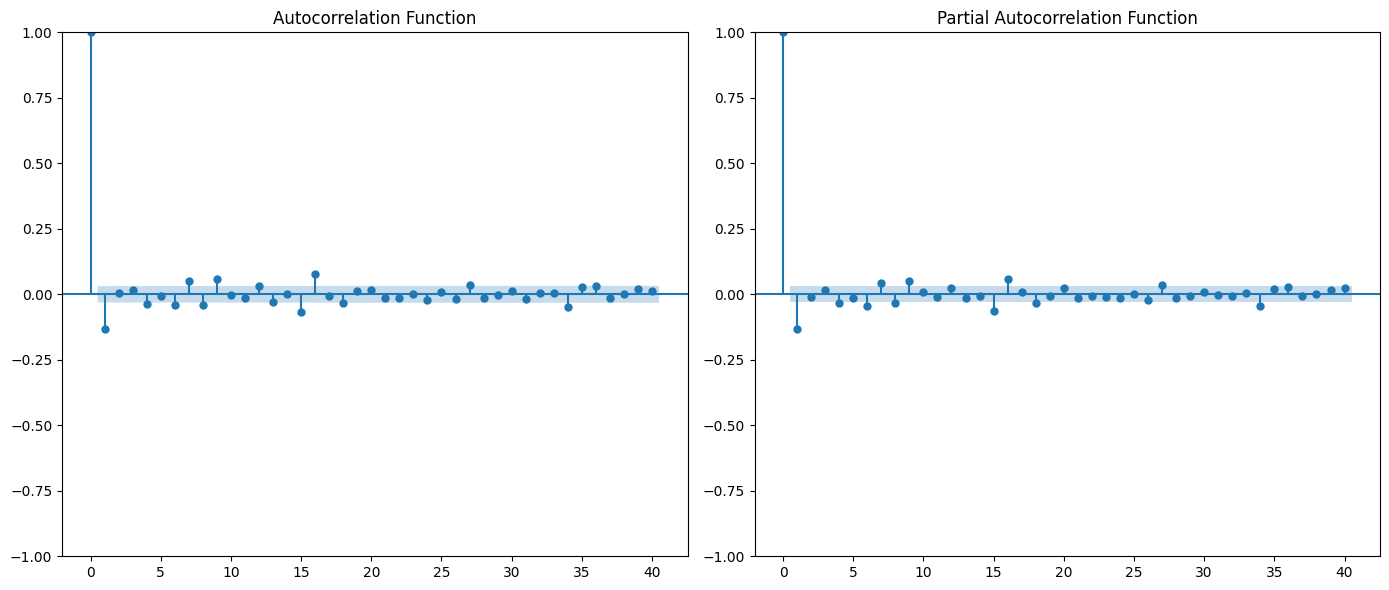

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 4018
Model:                 ARIMA(1, 0, 0)   Log Likelihood               11766.148
Date:                Thu, 28 Nov 2024   AIC                         -23526.295
Time:                        15:29:09   BIC                         -23507.399
Sample:                             0   HQIC                        -23519.599
                               - 4018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.451      0.147   -9.53e-05       0.001
ar.L1         -0.1312      0.007    -17.546      0.000      -0.146      -0.117
sigma2         0.0002   1.52e-06    110.021      0.0

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001675. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this

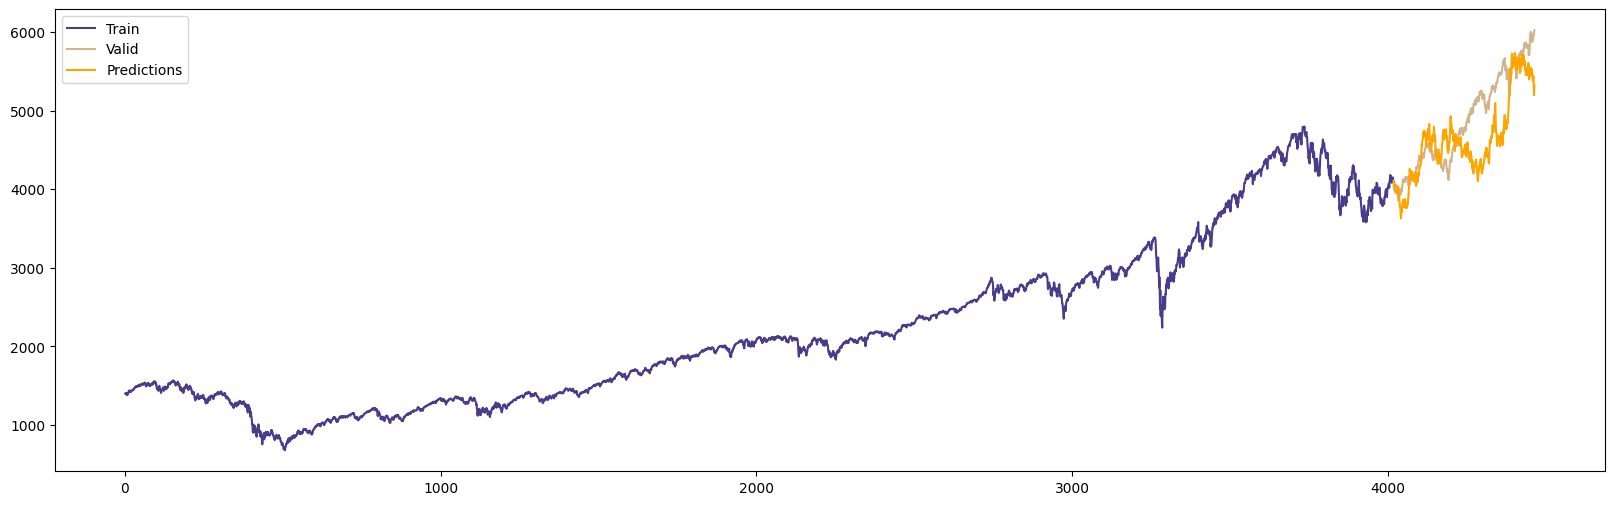

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
sp500_data = pd.read_csv('sp500.csv')

# Preprocess the data
sp500_data['Returns'] = np.diff(np.log(sp500_data['Close']), prepend=np.nan)
sp500_data = sp500_data.dropna(subset=['Returns'])

# Split the data into training and validation sets
train_data = sp500_data['Returns'][:int(0.9 * len(sp500_data))]
valid_data = sp500_data['Returns'][int(0.9 * len(sp500_data)):] 

# Plot ACF and PACF to determine ARIMA orders
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(train_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit an ARIMA model
p, d, q = 1, 0, 0  # Example values, adjust based on ACF/PACF plots
arima_model = sm.tsa.ARIMA(train_data, order=(p, d, q)).fit()
print(arima_model.summary())

# Get the residuals from the ARIMA model
residuals = arima_model.resid

# Fit a GARCH(1, 1) model to the residuals to capture volatility
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Make ARIMA forecast for the validation period
start_idx = len(train_data)
end_idx = len(train_data) + len(valid_data) - 1
y_pred_arima = arima_model.predict(start=start_idx, end=end_idx, typ='levels')

# Make GARCH forecast for the volatility
forecast = garch_fit.forecast(horizon=len(valid_data))
volatility_forecast = forecast.variance.values[-1, :]
noise = np.random.normal(0, np.sqrt(volatility_forecast), len(valid_data))

# Combine ARIMA forecast with GARCH volatility to get final predictions
y_pred = y_pred_arima + noise

# Calculate predicted prices from returns and previous price
predicted_prices = [sp500_data['Close'].iloc[len(train_data) - 1]]
for ret in y_pred:
    predicted_prices.append(predicted_prices[-1] * np.exp(ret))

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(sp500_data.index[:len(train_data)], sp500_data['Close'][:len(train_data)], color='darkslateblue', label='Train')
plt.plot(sp500_data.index[len(train_data):], sp500_data['Close'][len(train_data):], color='tan', label='Valid')
plt.plot(sp500_data.index[len(train_data):], predicted_prices[1:], color='orange', label='Predictions')
plt.legend()
plt.show()

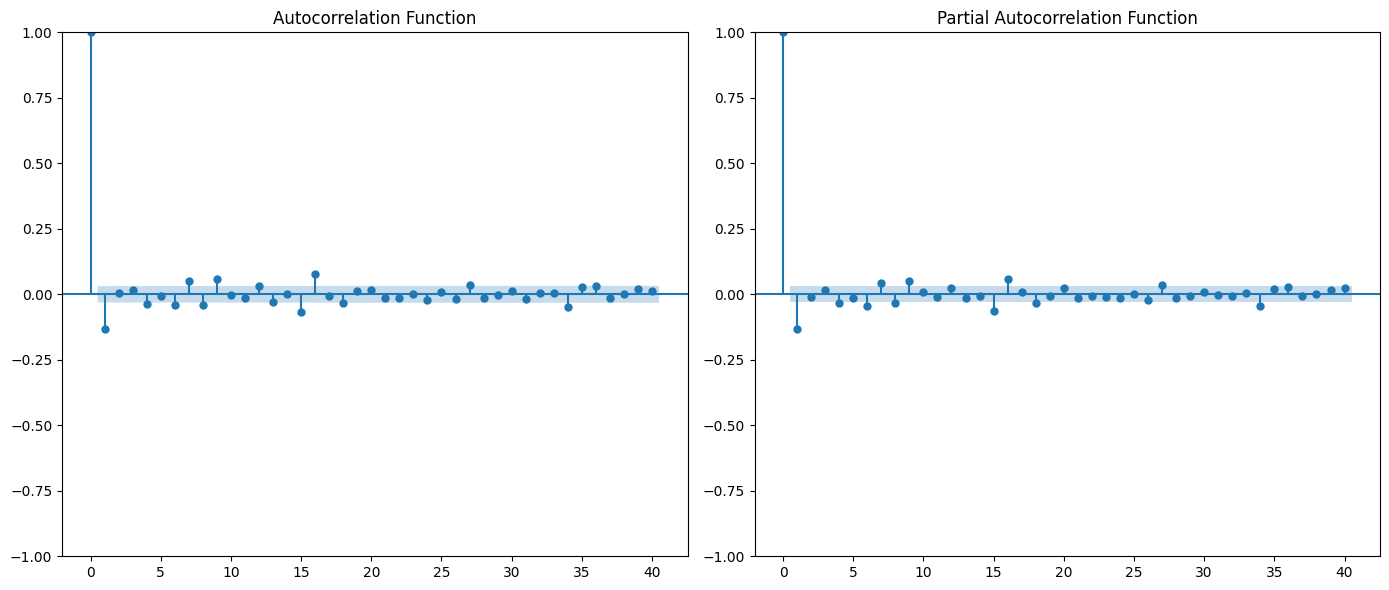

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 4018
Model:                 ARIMA(1, 0, 0)   Log Likelihood               11766.148
Date:                Thu, 28 Nov 2024   AIC                         -23526.295
Time:                        16:17:21   BIC                         -23507.399
Sample:                             0   HQIC                        -23519.599
                               - 4018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.451      0.147   -9.53e-05       0.001
ar.L1         -0.1312      0.007    -17.546      0.000      -0.146      -0.117
sigma2         0.0002   1.52e-06    110.021      0.0

/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001675. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/projectnb/ds340/students/rgangopa/.conda/envs/my_Conda_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this

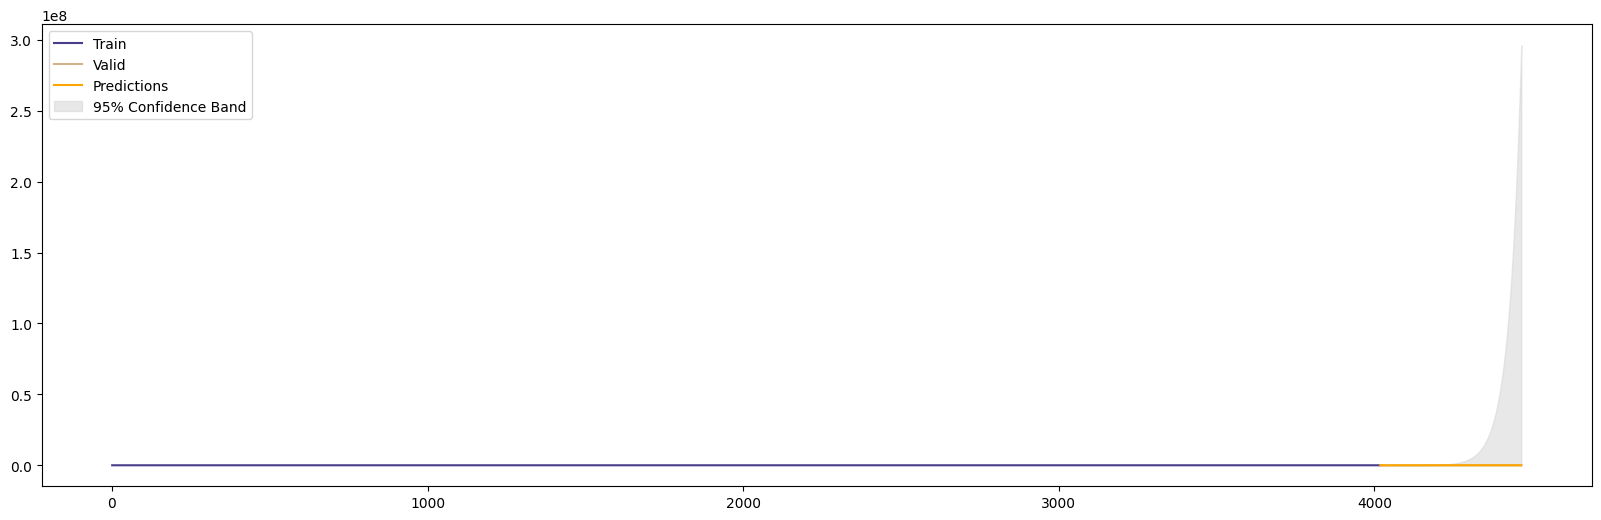

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
sp500_data = pd.read_csv('sp500.csv')

# Preprocess the data
sp500_data['Returns'] = np.diff(np.log(sp500_data['Close']), prepend=np.nan)
sp500_data = sp500_data.dropna(subset=['Returns'])

# Split the data into training and validation sets
train_data = sp500_data['Returns'][:int(0.9 * len(sp500_data))]
valid_data = sp500_data['Returns'][int(0.9 * len(sp500_data)):] 

# Plot ACF and PACF to determine ARIMA orders
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(train_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit an ARIMA model
p, d, q = 1, 0, 0  # Example values, adjust based on ACF/PACF plots
arima_model = sm.tsa.ARIMA(train_data, order=(p, d, q)).fit()
print(arima_model.summary())

# Get the residuals from the ARIMA model
residuals = arima_model.resid

# Fit a GARCH(1, 1) model to the residuals to capture volatility
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Make ARIMA forecast for the validation period
start_idx = len(train_data)
end_idx = len(train_data) + len(valid_data) - 1
y_pred_arima = arima_model.predict(start=start_idx, end=end_idx, typ='levels')

# Make GARCH forecast for the volatility
forecast = garch_fit.forecast(horizon=len(valid_data))
volatility_forecast = forecast.variance.values[-1, :]
noise = np.random.normal(0, np.sqrt(volatility_forecast), len(valid_data))

# Combine ARIMA forecast with GARCH volatility to get final predictions
y_pred = y_pred_arima + noise

# Calculate predicted prices from returns and previous price
predicted_prices = [sp500_data['Close'].iloc[len(train_data) - 1]]
for ret in y_pred:
    predicted_prices.append(predicted_prices[-1] * np.exp(ret))

# Calculate confidence bands
confidence_interval = 1.96 * np.sqrt(volatility_forecast)
upper_band = y_pred_arima + confidence_interval
lower_band = y_pred_arima - confidence_interval

# Calculate predicted prices for the confidence bands
upper_prices = [sp500_data['Close'].iloc[len(train_data) - 1]]
lower_prices = [sp500_data['Close'].iloc[len(train_data) - 1]]
for up_ret, low_ret in zip(upper_band, lower_band):
    upper_prices.append(upper_prices[-1] * np.exp(up_ret))
    lower_prices.append(lower_prices[-1] * np.exp(low_ret))

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(sp500_data.index[:len(train_data)], sp500_data['Close'][:len(train_data)], color='darkslateblue', label='Train')
plt.plot(sp500_data.index[len(train_data):], sp500_data['Close'][len(train_data):], color='tan', label='Valid')
plt.plot(sp500_data.index[len(train_data):], predicted_prices[1:], color='orange', label='Predictions')
plt.fill_between(sp500_data.index[len(train_data):], lower_prices[1:], upper_prices[1:], color='lightgray', alpha=0.5, label='95% Confidence Band')
plt.legend()
plt.show()
